# Machine Learning Project

This project is using K-Means algorithm to determine what property is most ideal. 
It uses Rolling Sales data from Nov. 2018 to Oct. 2019 as provided by New York City Open Data.

In [1]:
#install all relevant packages

import pandas as pd
import numpy as np
import sklearn as skl
import xlrd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#take the data of the 5 excel files that I have
dfM = pd.read_excel(r'~/Documents/GitHub/MIS637-Final/rollingsales_manhattan.xls')
dfX = pd.read_excel(r'~/Documents/GitHub/MIS637-Final/rollingsales_bronx.xls')
dfK = pd.read_excel(r'~/Documents/GitHub/MIS637-Final/rollingsales_brooklyn.xls')
dfQ = pd.read_excel(r'~/Documents/GitHub/MIS637-Final/rollingsales_queens.xls')
dfR = pd.read_excel(r'~/Documents/GitHub/MIS637-Final/rollingsales_statenisland.xls')

In [3]:
#combine the datasets and create a new one called df2019
df2019 = pd.concat([dfM, dfX, dfK, dfQ, dfR],sort=False)
df2019.reset_index(drop=True)
df2019

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,RESIDENTIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,BUILDING CLASS AT PRESENT,BUILDING CLASS AT TIME OF SALE
0,1,01 ONE FAMILY DWELLINGS,1,1,2,2090,3680,1940.0,1,3200000,NaN,NaN
1,1,01 ONE FAMILY DWELLINGS,1,1,1,987,2183,1860.0,1,0,NaN,NaN
2,1,01 ONE FAMILY DWELLINGS,1,1,1,1883,5200,1900.0,1,6100000,NaN,NaN
3,1,02 TWO FAMILY DWELLINGS,1,2,2,1510,4520,1900.0,1,0,NaN,NaN
4,1,02 TWO FAMILY DWELLINGS,1,2,2,1510,4520,1900.0,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7563,5,02 TWO FAMILY DWELLINGS,1,2,2,8846,1710,2001.0,1,637500,NaN,NaN
7564,5,05 TAX CLASS 1 VACANT LAND,1,0,0,6979,0,2018.0,1,599701,NaN,NaN
7565,5,05 TAX CLASS 1 VACANT LAND,1,0,0,5016,0,2018.0,1,896060,NaN,NaN
7566,5,06 TAX CLASS 1 - OTHER,1,0,0,7920,0,2011.0,1,0,NaN,NaN


In [4]:
df2019.drop(df2019.columns[[2,5,8,10,11]], axis=1, inplace=True)
#removed Tax Classes, Building Class at Present & Time of Sale, Land Square Feet
df2019

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,1,01 ONE FAMILY DWELLINGS,1,2,3680,1940.0,3200000
1,1,01 ONE FAMILY DWELLINGS,1,1,2183,1860.0,0
2,1,01 ONE FAMILY DWELLINGS,1,1,5200,1900.0,6100000
3,1,02 TWO FAMILY DWELLINGS,2,2,4520,1900.0,0
4,1,02 TWO FAMILY DWELLINGS,2,2,4520,1900.0,0
...,...,...,...,...,...,...,...
7563,5,02 TWO FAMILY DWELLINGS,2,2,1710,2001.0,637500
7564,5,05 TAX CLASS 1 VACANT LAND,0,0,0,2018.0,599701
7565,5,05 TAX CLASS 1 VACANT LAND,0,0,0,2018.0,896060
7566,5,06 TAX CLASS 1 - OTHER,0,0,0,2011.0,0


In [5]:
# We want the first two characters of the building class category
df2019['BUILDING CLASS CATEGORY'] = df2019['BUILDING CLASS CATEGORY'].astype(str).str[0:2]
df2019

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,1,01,1,2,3680,1940.0,3200000
1,1,01,1,1,2183,1860.0,0
2,1,01,1,1,5200,1900.0,6100000
3,1,02,2,2,4520,1900.0,0
4,1,02,2,2,4520,1900.0,0
...,...,...,...,...,...,...,...
7563,5,02,2,2,1710,2001.0,637500
7564,5,05,0,0,0,2018.0,599701
7565,5,05,0,0,0,2018.0,896060
7566,5,06,0,0,0,2011.0,0


We are only looking for residential build class categories that are not Co-ops nor Rentals. These are the building class categories deemed acceptable. 

01: One Family Dwelling

02: Two Family Dwelling

03: Three Family Dwelling

04: Tax Class 1 Condos

12: Condos Walkup Apt

13: Condos Elevator Apt

15: Condos 2-10 Unit Residential

In [6]:
AcceptedBuildClass = ['01','02','03','04','12','13','15']
df2019 = df2019[df2019['BUILDING CLASS CATEGORY'].isin(AcceptedBuildClass)]

# Data Analysis
We will look at the data to get rid of various outliers.

In [7]:
#sales prices shouldn't be zero
newdf2019 = df2019[df2019['SALE PRICE']>0]

newdf2019

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,1,01,1,2,3680,1940.0,3200000
2,1,01,1,1,5200,1900.0,6100000
6,1,03,3,3,3600,1899.0,6300000
79,1,13,0,0,588,1920.0,810000
80,1,13,0,0,605,1920.0,847000
...,...,...,...,...,...,...,...
7558,5,02,2,2,2377,1998.0,640000
7559,5,02,2,2,2400,2000.0,917000
7561,5,02,2,2,2160,2001.0,610000
7562,5,02,2,2,2565,2001.0,625000


In [ ]:
# Find Mean, 1st and 3rd Quartiles and get rid of outliers.

In [ ]:

newdf2019 = df2019[df2019['SALE PRICE']<0]

In [8]:
df = newdf2019.copy()
df

,BOROUGH,BUILDING CLASS CATEGORY,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
0,1,01,1,2,3680,1940.0,3200000
2,1,01,1,1,5200,1900.0,6100000
6,1,03,3,3,3600,1899.0,6300000
79,1,13,0,0,588,1920.0,810000
80,1,13,0,0,605,1920.0,847000
...,...,...,...,...,...,...,...
7558,5,02,2,2,2377,1998.0,640000
7559,5,02,2,2,2400,2000.0,917000
7561,5,02,2,2,2160,2001.0,610000
7562,5,02,2,2,2565,2001.0,625000


# Comparing Gross Square Feet and Sales Price

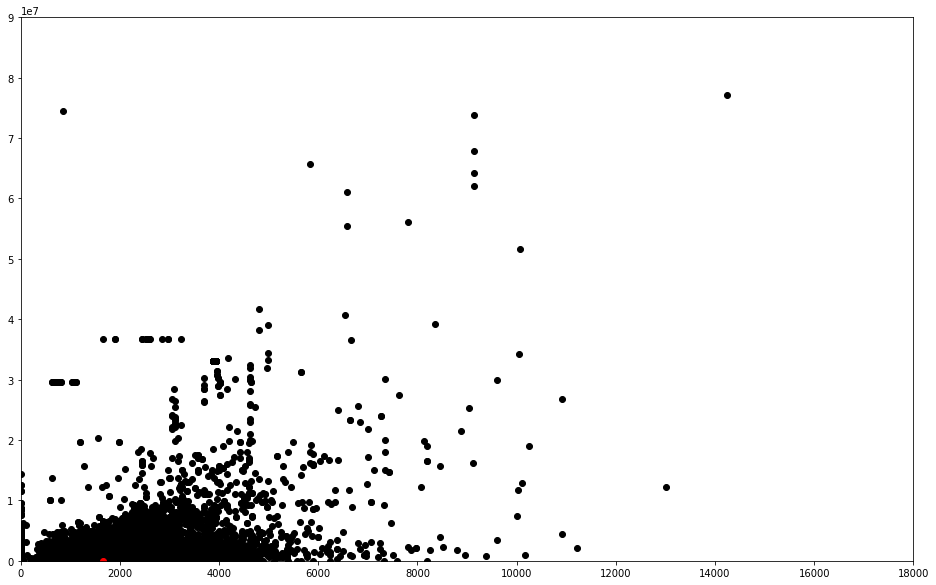

In [49]:
np.random.seed(30000)
k = 3
# centroids[i] = [x, y]
centroids = {
    i+1: [np.random.randint(0, 37160), np.random.randint(0, 37160)]
    for i in range(k)
}
    
fig = plt.figure(figsize=(16, 10))
plt.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE'], color='k')
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 18000)
plt.ylim(0, 90000000)
plt.show()

This data cannot be properly observed due to the various outliers. We will cap the sale price of the place at 40000000. 

    BOROUGH BUILDING CLASS CATEGORY  RESIDENTIAL UNITS  TOTAL UNITS  \
0         1                      01                  1            2   
2         1                      01                  1            1   
6         1                      03                  3            3   
79        1                      13                  0            0   
80        1                      13                  0            0   

    GROSS SQUARE FEET  YEAR BUILT  SALE PRICE  distance_from_1  \
0                3680      1940.0     3200000     3.172303e+06   
2                5200      1900.0     6100000     6.072303e+06   
6                3600      1899.0     6300000     6.272302e+06   
79                588      1920.0      810000     7.823027e+05   
80                605      1920.0      847000     8.193027e+05   

    distance_from_2  distance_from_3  closest color  
0      3.187625e+06     3.172605e+06        1     r  
2      6.087596e+06     6.072547e+06        1     r  
6      6.28759

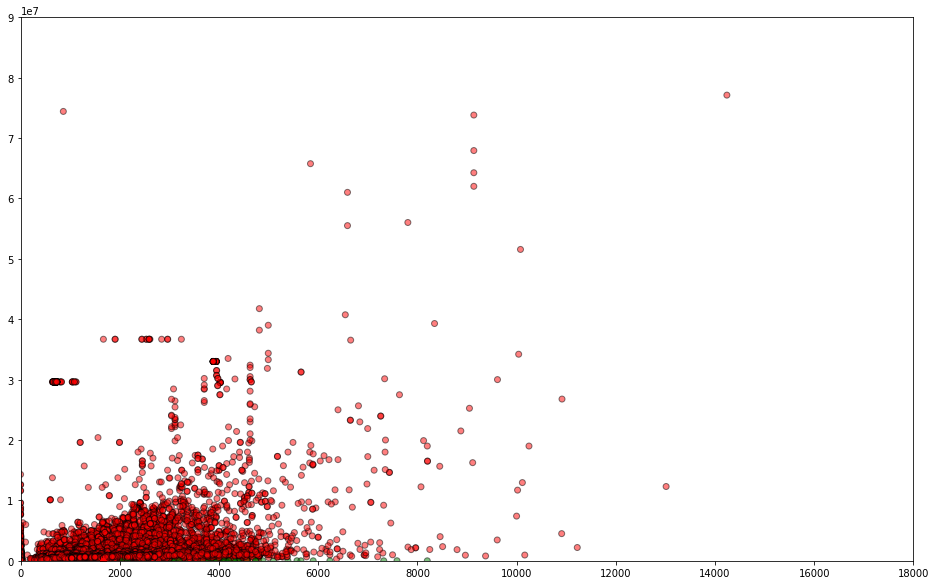

In [50]:
def assignment(df, centroids):
    for i in centroids.keys():
        # sqrt((x1 - x2)^2 - (y1 - y2)^2)
        df['distance_from_{}'.format(i)] = (
            np.sqrt(
                (df['GROSS SQUARE FEET'] - centroids[i][0]) ** 2
                + (df['SALE PRICE'] - centroids[i][1]) ** 2
            )
        )
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

df = assignment(df, centroids)
print(df.head())

fig = plt.figure(figsize=(16, 10))
plt.scatter(df['GROSS SQUARE FEET'], df['SALE PRICE'], color=df['color'], alpha=0.5, edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])
plt.xlim(0, 18000)
plt.ylim(0, 90000000)
plt.show()